In [82]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Text Blob
from textblob import TextBlob

# NLTK
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from keras.layers import LSTM, Convolution1D, Flatten, Dropout, Dense
from keras.layers.embeddings import Embedding
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 4)

[nltk_data] Downloading package stopwords to /home/anmol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('TigerZindaHai.txt')

In [4]:
df = df.drop(['Unnamed: 0'] , axis = 1)

In [9]:
df.head(10)

,Ratings,Title,Date,Content
0,7/10,Fiction ZInda Hai,25 December 2017,The whole idea of watching a movie is to get e...
1,5/10,Long Review: Tiger Zinda Hai,26 December 2017,"Today, one is so much familiar with the type o..."
2,2/10,Another mediocre blockbuster,29 December 2017,I watched this movie on Christmas eve with pac...
3,1/10,What a fake movie!!!!!!,25 December 2017,Background music to some extent is good. Salma...
4,6/10,"""Script Zinda Nahi Hai""- but still watchable f...",22 December 2017,Salman Khan never dissappoints at the box offi...
5,1/10,Piece of junk !!!,26 December 2017,"As expected,one more salman khan movie with no..."
6,1/10,What a load of BS!!,25 February 2018,Again and Again Bhai proves how un-evlolved he...
7,4/10,Boring,14 February 2018,Movie was good for first 10 minutes and after ...
8,4/10,Only for Salman fans!,10 February 2018,"No logic in fight scenes. Story is weak, have ..."
9,1/10,Expected crap,3 January 2018,Appeasement and glorification of real life cri...


In [5]:
df['Ratings'] = df['Ratings'].apply(lambda x: x.replace('/10',''))

In [12]:
df.head()

,Ratings,Title,Date,Content
0,7,Fiction ZInda Hai,25 December 2017,The whole idea of watching a movie is to get e...
1,5,Long Review: Tiger Zinda Hai,26 December 2017,"Today, one is so much familiar with the type o..."
2,2,Another mediocre blockbuster,29 December 2017,I watched this movie on Christmas eve with pac...
3,1,What a fake movie!!!!!!,25 December 2017,Background music to some extent is good. Salma...
4,6,"""Script Zinda Nahi Hai""- but still watchable f...",22 December 2017,Salman Khan never dissappoints at the box offi...


## Below Graph is showing 1 star ratings and 10 star ratings are almost same

1     33
10    32
8      8
7      8
4      8
5      8
9      5
6      5
2      4
3      4
Name: Ratings, dtype: int64


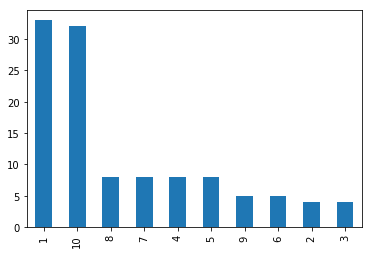

In [26]:
df['Ratings'].value_counts().plot.bar()
print (df['Ratings'].value_counts())

## Done some approx.

#### Ratings >=5   Positive Ratings (1)
#### Ratings < 5 Negative Ratings (0)

#### Positive Ratings (115 users) -> 57.39%
#### Negative Ratings (115 Users) -> 42.60%

In [6]:
df['PosNeg'] = df['Ratings'].apply(lambda x : 0 if(int(x)<5) else 1)    

In [7]:
df.head()

,Ratings,Title,Date,Content,PosNeg
0,7,Fiction ZInda Hai,25 December 2017,The whole idea of watching a movie is to get e...,1
1,5,Long Review: Tiger Zinda Hai,26 December 2017,"Today, one is so much familiar with the type o...",1
2,2,Another mediocre blockbuster,29 December 2017,I watched this movie on Christmas eve with pac...,0
3,1,What a fake movie!!!!!!,25 December 2017,Background music to some extent is good. Salma...,0
4,6,"""Script Zinda Nahi Hai""- but still watchable f...",22 December 2017,Salman Khan never dissappoints at the box offi...,1


1    66
0    49
Name: PosNeg, dtype: int64


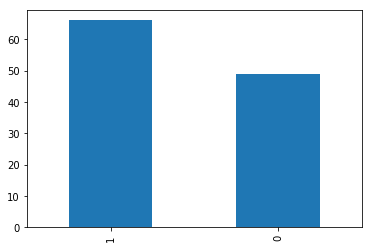

In [65]:
df['PosNeg'].value_counts().plot.bar()
print(df['PosNeg'].value_counts())

In [8]:
print ("Positive Ratings : " + str(float(66/115.0) * 100))
print ("Negative Ratings : " + str(float(49/115.0) * 100))

Positive Ratings : 57.3913043478
Negative Ratings : 42.6086956522


# Visualizing Relative percentage of positive reviews according to dates

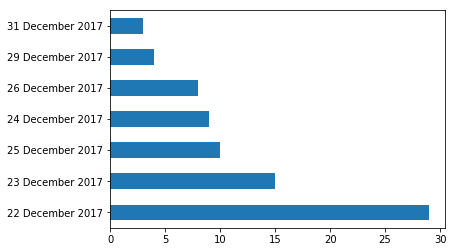

In [78]:
df['Date'].value_counts()[:7].plot.barh()

In [86]:
lis = df['Date'].value_counts()[:7].index.tolist()
lis_value = df['Date'].value_counts()[:7]

In [100]:
def getCount(date):
    count = 0
    for i in range(0,df.shape[0]):
        if(str(df['Date'][i]) == str(date)):
            if(int(df['PosNeg'][i]) == 1):
                count = count+1
    return count

perce = []
for i in lis:
    total = lis_value[i]
    d = getCount(i)
    print(d)
    print ('Total Perc. of Positive Comments on '+str(i)+' : '+str(int(float(d/float(total))*100)))
    perce.append(int(float(d/float(total))*100))

21
Total Perc. of Positive Comments on 22 December 2017 : 72
12
Total Perc. of Positive Comments on 23 December 2017 : 80
6
Total Perc. of Positive Comments on 25 December 2017 : 60
6
Total Perc. of Positive Comments on 24 December 2017 : 66
3
Total Perc. of Positive Comments on 26 December 2017 : 37
1
Total Perc. of Positive Comments on 29 December 2017 : 25
1
Total Perc. of Positive Comments on 31 December 2017 : 33


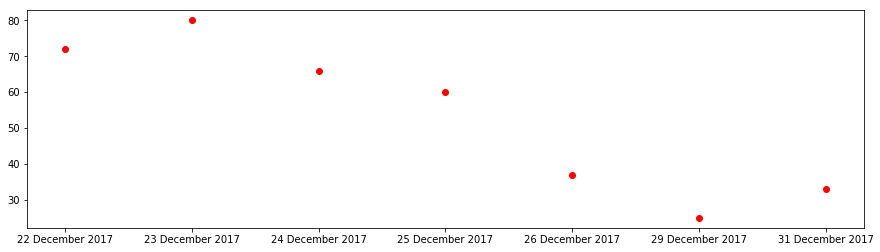

In [121]:
plt.plot(lis,perce,'ro')

# Sentiment Analysis 

### Accuracy :
#### 1. Gaussian Naive bayes - 78
#### 2. SVM - 78
#### 3. LSTM - 86

In [9]:
df.head()

,Ratings,Title,Date,Content,PosNeg
0,7,Fiction ZInda Hai,25 December 2017,The whole idea of watching a movie is to get e...,1
1,5,Long Review: Tiger Zinda Hai,26 December 2017,"Today, one is so much familiar with the type o...",1
2,2,Another mediocre blockbuster,29 December 2017,I watched this movie on Christmas eve with pac...,0
3,1,What a fake movie!!!!!!,25 December 2017,Background music to some extent is good. Salma...,0
4,6,"""Script Zinda Nahi Hai""- but still watchable f...",22 December 2017,Salman Khan never dissappoints at the box offi...,1


In [112]:
class NN:
    def __init__(self):
        self.model = Sequential()

    #input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
    #output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
    #input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.
    def EmbeddingLayer(self,input_dim,emb_dim,input_len = None):
        print('Input Dimension : ' + str(input_dim))
        print('Embedding Dimension : ' + str(emb_dim))
        print('Input Length : ' + str(input_len))
        self.model.add(Embedding(input_dim,emb_dim,input_length=input_len))
        print('Embedd Success')
        
    def Conv1D(self,n_filters,kernel,padding = 'valid'):
        self.model.add(Convolution1D(n_filters,kernel,padding = padding))
    
    # Flattening
    def Flatten(self):
        self.model.add(Flatten())
        
    # Hidden Layer    
    def HiddenLayer(self,output,activation):
        self.model.add(Dense(output,activation=activation))
                    
    # Output Layer                   
    def Output(self,output,activation):
        self.model.add(Dense(output,activation=activation))
    
    def Compile(self,loss,opt,metr):
        self.model.compile(loss = loss , optimizer = opt , metrics = [metr]) 
        print("Successfully Compiled")
                        
    def modelSummary(self):
        print("Model Summary \n")
        print(self.model.summary())   
        
    def FitTrain(self , x_train , y_train , batch_size , epochs):
        self.model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)
        
    def Predictions(self,x_test):
        return self.model.predict(x_test)
    
    def LSTM(self,output,return_sequences = False , drop_out = None):
        self.model.add(LSTM(output ,return_sequences = return_sequences , dropout = drop_out))
        
    def Toeknizer(self , max_features ,data,split = ' '):
        self.tokenizer = Tokenizer(num_words=max_features, split=split)
        self.tokenizer.fit_on_texts(data)
    
    def PadSequences(self,data):
        X = self.tokenizer.texts_to_sequences(data)
        #print ("Pad Seq. X : " + str(X))
        X = pad_sequences(X)
        return X

In [113]:
class NLP:
    def __init__(self,rows,dataset):
        self.rows = rows
        self.dataset = dataset
        
    def preprocess(self,content):
        corpus = []
        for i in range(0,self.rows):
            review = re.sub('[^a-zA-Z]', ' ', self.dataset[content][i])
            review = review.lower()
            review = review.split()
            ps = PorterStemmer()
            review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
            review = ' '.join(review)
            corpus.append(review)
            self.corpus = corpus
        return corpus
    
    #Creating Bag of words models
    def CountVectorizer(self,y_num,prin = False):
        max_features = self.getVocabSize()
        cv = CountVectorizer(max_features = max_features)
        self.X = cv.fit_transform(self.corpus).toarray()
        self.y = self.dataset.iloc[:, y_num].values
        if prin:
            print('X : ' + str(self.X))
            print ('Y : ' + str(self.y))
            print('X_Shape : ' + str(self.X.shape))
            print ('Y_Shape : ' + str(self.y.shape))
            
            
    #TfIdf Vectorizer
    def TFIDFVectorizor(self,y_num,prin = False):
        print (" TFIDFVectorizor : You can change min_df , max_df , ngram_range in the function")
        print ("Currently : \n min_df = 2 max_df = 0.5 ngram_range = (1,2)")
        tfidf = TfidfVectorizer(min_df = 2 , max_df = 0.5 , ngram_range = (1,2))
        weights = tfidf.fit_transform(self.corpus)
        self.X = weights.toarray()
        self.y = self.dataset.iloc[:, y_num].values
        if prin:
            print('X : ' + str(self.X))
            print ('Y : ' + str(self.y))
            print('X_Shape : ' + str(self.X.shape))
            print ('Y_Shape : ' + str(self.y.shape))
            print ('\n-------------------------------------------------\n')
            mydict = tfidf.vocabulary_
            i = 0
            for key, value in sorted(mydict.iteritems(), key=lambda (k,v): (v,k)):
                i = i+1
                print(str(key) + ' -> ' + str(value)+ ' :: ')                
        
    
    def TrainTestSplit(self , test_size , rs,prin = False):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size, random_state = rs)
        if prin:
            print('X_train : ' + str(self.X_train))
            print ('Y_train : ' + str(self.y_train))
            print('X_test : ' + str(self.X_test))
            print ('Y_test : ' + str(self.y_test)) 
            print('X_train_Shape : ' + str(self.X_train.shape))
            print ('Y_train_Shape : ' + str(self.y_train.shape))
            print('X_test_Shape : ' + str(self.X_test.shape))
            print ('Y_test_Shape : ' + str(self.y_test.shape)) 
            
        
    def ConfusionMatrix(self,y_test,y_pred):
        cm = confusion_matrix(y_test, y_pred)
        print ("Confusion Matrix : \n" + str(cm))
        total = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
        accurate = cm[0][0] + cm[1][1]
        print ("Accuracy : " + str(int(float(accurate/float(total))*100)))
        
    # Get Vocab Size
    def getVocabSize(self):
        vocab = []
        for i in range(len(self.corpus)):
            for j in self.corpus[i].split():
                vocab.append(j)
        print ("Vocabulary Size : " + str(len(set(vocab))))
        return len(set(vocab))
    
    
 ############################# MODELS ####################################################   
    
    def oneDConv(self,max_features,embd_dim):
        n = NN()
        n.EmbeddingLayer(max_features,embd_dim,int(self.X_train.shape[1]))

        # Specify according to your choice
        n.Conv1D(64,3)
        n.Conv1D(32,3)
        n.Conv1D(16,3)
        n.Flatten()
        n.HiddenLayer(128,'relu')
        n.Output(1,'relu')
        n.modelSummary()
        
        # Compiling the model
        n.Compile('binary_crossentropy','adam','accuracy')
        
        # FitTraining
        n.FitTrain(self.X_train,self.y_train,16,10)
        y_pred = n.Predictions(self.X_test)
        print (y_pred)
        
        
     # LSTM 
    def LSTM(self,max_features,embd_dim):
        n = NN()
        n.Toeknizer(max_features,self.corpus)
        self.X = n.PadSequences(self.corpus)
        #print("X : " + str(self.X))
        self.y = self.dataset.iloc[:, -1].values
        self.TrainTestSplit(0.2 , 0)
        n.EmbeddingLayer(max_features,embd_dim,self.X.shape[1])
        n.LSTM(30,False,0.2)
        n.Output(1 , 'relu')
        n.modelSummary()
         # Compiling the model
        n.Compile('binary_crossentropy','adam','accuracy')
        n.FitTrain(self.X_train,self.y_train,16,10)
        y_pred = n.Predictions(self.X_test)
        #print ("Before : " + str(y_pred))
        y_pred = (y_pred>=0.5)
        #print ("After : " + str(y_pred))
        self.ConfusionMatrix(self.y_test , y_pred)
        
        
        
     # Logistic Regression
    def LogisticRegression(self):
        self.classifier = LogisticRegression()
        self.classifier.fit(self.X_train,self.y_train)
        # Predicting the Test set results
        y_pred = self.classifier.predict(self.X_test)
        print ("y_pred : \n" + str(y_pred))
        self.ConfusionMatrix(self.y_test,y_pred)      
        
        
    def XGBoost(self):
        print ("Fine Tune it :)")
        self.classifier = XGBClassifier(n_estimators=100 , max_depth = 6)
        self.classifier.fit(self.X_train,self.y_train)
        # Predicting the Test set results
        y_pred = self.classifier.predict(self.X_test)
        print ("y_pred : \n" + str(y_pred))
        self.ConfusionMatrix(self.y_test,y_pred)
        
    # SVM Classifier    
    def SVM(self,kernel,rs):
        self.classifier = SVC(kernel = kernel ,random_state = rs)
        self.classifier.fit(self.X_train,self.y_train)
        # Predicting the Test set results
        y_pred = self.classifier.predict(self.X_test)
        print ("y_pred : \n" + str(y_pred))
        self.ConfusionMatrix(self.y_test,y_pred)
        
        
    # Gaussian Naive Bayes Classifier
    def GaussianNB(self):
        self.classifier = GaussianNB()
        self.classifier.fit(self.X_train, self.y_train)
        # Predicting the Test set results
        y_pred = self.classifier.predict(self.X_test)
        print ("y_pred : \n" + str(y_pred))
        self.ConfusionMatrix(self.y_test,y_pred)   
    

In [114]:
nlp = NLP(df.shape[0] , df)
corpus = nlp.preprocess('Title')

### Using CountVectorizer

In [99]:
nlp.CountVectorizer(-1)
nlp.TrainTestSplit(0.2,0)

Vocabulary Size : 218


In [100]:
# Gaussian Naive bayes
print("Gaussian Naive Bayes :\n")
nlp.GaussianNB()

Gaussian Naive Bayes :

y_pred : 
[0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0]
Confusion Matrix : 
[[ 8  1]
 [ 4 10]]
Accuracy : 78


In [101]:
# SVM Classifier
print("SVM : \n")
nlp.SVM('linear' , 0)

SVM : 

y_pred : 
[0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0]
Confusion Matrix : 
[[ 7  2]
 [ 3 11]]
Accuracy : 78


In [102]:
#Logistic Regression
print ("Logistic Regression")
nlp.LogisticRegression()

Logistic Regression
y_pred : 
[0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0]
Confusion Matrix : 
[[ 7  2]
 [ 2 12]]
Accuracy : 82


In [103]:
#XGBoost
print ("XGBoost \n")
nlp.XGBoost()

XGBoost 

Fine Tune it :)
y_pred : 
[0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0]
Confusion Matrix : 
[[ 7  2]
 [ 4 10]]
Accuracy : 73


### Using TfIdf Vectorizor

In [97]:
nlp.TFIDFVectorizor(-1)
nlp.TrainTestSplit(0.2,0)

 TFIDFVectorizor : You can change min_df , max_df , ngram_range in the function
Currently : 
 min_df = 2 max_df = 0.5 ngram_range = (1,2)


In [23]:
# Gaussian Naive bayes
print("Gaussian Naive Bayes :\n")
nlp.GaussianNB()

Gaussian Naive Bayes :

y_pred : 
[0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0]
Confusion Matrix : 
[[ 8  1]
 [ 3 11]]
Accuracy : 82


In [24]:
# SVM Classifier
print("SVM : \n")
nlp.SVM('linear' , 0)

SVM : 

y_pred : 
[0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0]
Confusion Matrix : 
[[ 7  2]
 [ 1 13]]
Accuracy : 86


In [81]:
#Logistic Regression
print ("Logistic Regression")
nlp.LogisticRegression()

Logistic Regression
y_pred : 
[0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Confusion Matrix : 
[[ 5  4]
 [ 0 14]]
Accuracy : 82


In [98]:
#XGBoost
print ("XGBoost \n")
nlp.XGBoost()

XGBoost 

Fine Tune it :)
y_pred : 
[0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0]
Confusion Matrix : 
[[8 1]
 [6 8]]
Accuracy : 69


## Using LSTM

In [116]:
nlp.LSTM(218,218)

Input Dimension : 218
Embedding Dimension : 218
Input Length : 17
Embedd Success
Model Summary 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 17, 218)           47524     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                29880     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 77,435
Trainable params: 77,435
Non-trainable params: 0
_________________________________________________________________
None
Successfully Compiled
Epoch 1/10
92/92 [==============================] - 1s 7ms/step - loss: 3.2615 - acc: 0.4348
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 0.8627 - acc: 0.4348
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6766 - acc: 0.6196